<a href="https://colab.research.google.com/github/silviabarasa/Week4-CoreIP/blob/main/SILVIA_WAKASA_week4IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

# 1. Defining the Question

###a) Specifying the Data Analytic question:PROBLEM STATEMENT
Investigate a claim about  the blue cars from the autilob dataset.

> Null hypothesis: there is no difference in the average number of blue cars taken on saturday and that of the blue cars taken on sunday?

> Alternative hypothesis:  there is a difference in the average number of blue cars taken on saturday to that of the blue cars taken on sunday(***CLAIM:***)

### b) **Defining the Metric for Success**


> The objectives for this data includes investigating the claim listed above and knowing whether or not the the average number of blue cars taken on saturday is different from that of the blue cars taken on sunday

### c) **Understanding the context**

> Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. 

## d) Recording the Experimental Design

*   Defining the research question

*   Finding and dealing with outliers, anomalies, and missing data within the dataset.

*   Plot appropriate univariate and bivariate summaries recording our observations.

*   Implement the solution by performing hypothesis testing.
*  Challenge your solution by providing insights on how you can make improvements.
Defining the research question

## e) **Relevance of the data**
THe data that was used for survey was obtained from an open datasource. The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging). the dataset used was ranging from january to july of 2018 and is relevant for this analysis

# **DATA EXPLORATION**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# reading in data and previwing first five rows
url = 'http://bit.ly/DSCoreAutolibDataset'
df = pd.read_csv(url)
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [3]:
#previewing the bottom of our dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


## Checking the data

In [4]:
#previewing information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [5]:
#Viewing columns in our dataset
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [6]:
#checking the shape of our dataset
df.shape

(16085, 13)

#Data cleaning

####Validity

In [7]:

to_drop = ['Utilib_taken_sum', 'Utilib_returned_sum',	'Utilib_14_taken_sum',	'Utilib_14_returned_sum']
df.drop(to_drop, axis=1, inplace=True)

In [8]:
#Outliers
# checking for outliers using IQR Scores
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
outlier.sum()


# The two commented lines of code below can be used to drop the outliers but for now I will not drop them since the whole dataset is important for my analysis

# df_no_outlier = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

# df_no_outlier

BlueCars_returned_sum    2213
BlueCars_taken_sum       2215
Postal code              3899
Slots_freed_sum          3235
Slots_taken_sum          3234
date                        0
dayOfWeek                   0
day_type                    0
n_daily_data_points      2670
dtype: int64

In [9]:
# Checking for Anomalies
#


q1_1, q3_1 = np.percentile(df['BlueCars_returned_sum'], [25, 75]) 

iqr1 = q3_1 - q1_1

l_bound = q1_1 - (1.5*iqr1)
u_bound = q3_1 + (1.5 * iqr1)

q1_2, q3_2 = np.percentile(df['BlueCars_taken_sum'], [25, 75]) 

iqr2 = q3_2 - q1_2

l_bound = q1_2 - (1.5*iqr2)
u_bound = q3_2 + (1.5 * iqr2)
q1_3, q3_3 = np.percentile(df['Slots_freed_sum'], [25, 75]) 

iqr3 = q3_3 - q1_3

l_bound = q1_1 - (1.5*iqr3)
u_bound = q3_3 + (1.5 * iqr3)
q1_4, q3_4 = np.percentile(df['Slots_taken_sum'], [25, 75]) 

iqr4 = q3_4 - q1_4

l_bound = q1_1 - (1.5*iqr3)
u_bound = q3_3 + (1.5 * iqr3)
q1_5, q3_5 = np.percentile(df['Postal code'], [25, 75]) 

iqr5 = q3_5 - q1_5

l_bound = q1_1 - (1.5*iqr3)
u_bound = q3_3 + (1.5 * iqr3)
q1_6, q3_6 = np.percentile(df['n_daily_data_points'], [25, 75]) 

iqr6 = q3_6 - q1_6

l_bound = q1_1 - (1.5*iqr3)
u_bound = q3_3 + (1.5 * iqr3)
print(iqr1)
print( iqr2)
print(iqr3)
print(iqr4)
print(iqr5)
print(iqr6)

115.0
115.0
5.0
5.0
2070.0
1.0


####Accuracy

In [10]:
#Dropping all rows where the value of date is less than 0 or greater than 6
nr = df[(df['dayOfWeek'] < 0) & (df['dayOfWeek'] > 6) ].index
df.drop(nr , inplace=True)
#Checking if any of the rows dropped
df.shape
#From the result all rows are accurate and within range

(16085, 9)

####Completeness

In [11]:
#Checking for null values
df.isnull().any().sum()

0

####Consistency

In [12]:
#Checking for duplicates
df.duplicated().sum()

0

####Uniformity

In [13]:
#Changing date column from object to datetime
df['date'] = pd.to_datetime(df['date'])

In [14]:
#changing column names to lower case and placing underscore to make the column names be more presentable
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

In [15]:
#Creating a new column week_day with day of week in words
daydict = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df['week_day']  = df['dayofweek'].map(daydict)
df.head(2)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,week_day
0,75001,2018-01-01,1440,0,weekday,110,103,22,20,Mon
1,75001,2018-01-02,1438,1,weekday,98,94,23,22,Tue


# **EXPLORATORY ANALYSIS**

##Univariate Analysis

#### Categorical variables

***##Frequency tables***

In [16]:
#frequency table of day type
da1 = df.day_type.value_counts()
print("The frequency of day type is: \n", da1)
print('\n')
#Frequency table of week day
da2 = df.week_day.value_counts()
print("The frequency of week_day is: \n", da2)
print('\n')

The frequency of day type is: 
 weekday    11544
weekend     4541
Name: day_type, dtype: int64


The frequency of week_day is: 
 Mon     2374
Tue     2363
Sun     2274
Fri     2271
Wed     2268
Thur    2268
Sat     2267
Name: week_day, dtype: int64




***##Bar charts and histograms***

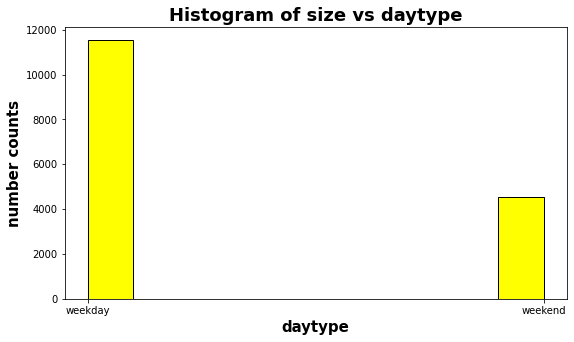

In [17]:
#Histogram of day type
daytype = df['day_type']
plt.figure(figsize=(9,5))
plt.hist(daytype, histtype='bar', color='yellow', edgecolor='black')
plt.xlabel('daytype', fontweight='bold', color='black', fontsize=15)
plt.ylabel('number counts', fontweight='bold', color='black', fontsize=15)
plt.title('Histogram of size vs daytype', fontweight='bold', color='black', fontsize=18)
plt.show()

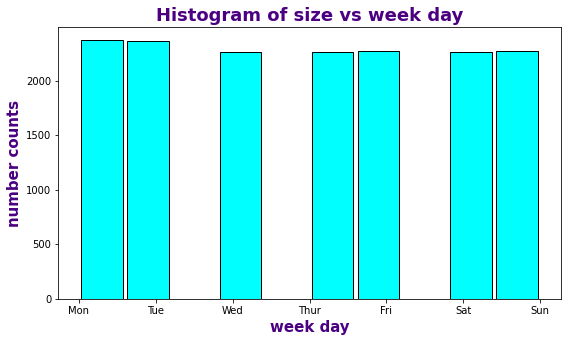

In [18]:
#Histogram of weekday
weekday = df['week_day']
plt.figure(figsize=(9,5))
plt.hist(weekday, bins=10, histtype='bar', rwidth=0.9, color='cyan', edgecolor='black')
plt.xlabel('week day', fontweight='bold', color='indigo', fontsize=15)
plt.ylabel('number counts', fontweight='bold', color='indigo', fontsize=15)
plt.title('Histogram of size vs week day', fontweight='bold', color='indigo', fontsize=18)
plt.show()

***##pie charts***

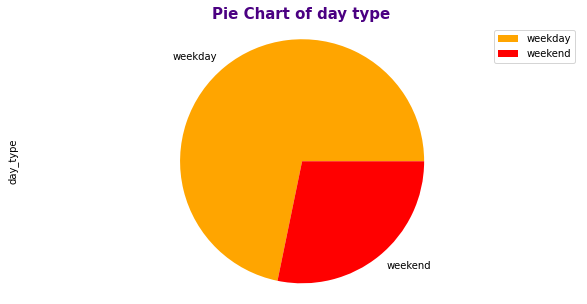

In [19]:
#pie chart for day type
daytype= df['day_type'].value_counts().plot(kind='pie',colors=['orange','red'])
fig=plt.gcf()
fig.set_size_inches(10,5)
#plt.pie(gender,labels= gender,colors=colors,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.legend(loc='upper right')
plt.title('Pie Chart of day type', fontweight='bold', fontsize=15, color='indigo')
plt.show()

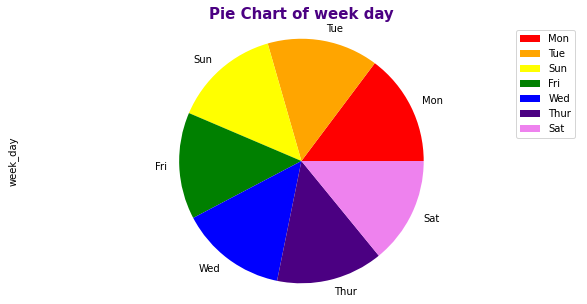

In [20]:
#pie chart for day type
daytype= df['week_day'].value_counts().plot(kind='pie', colors=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])
fig=plt.gcf()
fig.set_size_inches(10,5)
#plt.pie(gender,labels= gender,colors=colors,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.legend(loc='upper right')
plt.title('Pie Chart of week day', fontweight='bold', fontsize=15, color='indigo')
plt.show()

#### Numerical Variables

***##Measures of central tendancy***

In [21]:
#mean, median and mode for blue cars taken
d1 = df['bluecars_taken_sum'].mean()
print("The mean for blue cars taken is: \n", d1)
print('\n')
d2 = df['bluecars_taken_sum'].median()
print("The median for blue cars taken  is: \n", d2)
print('\n')
d3 = df['bluecars_taken_sum'].mode()
print("The mode for blue cars taken  is: \n", d3)
print('\n')


The mean for blue cars taken is: 
 125.92695057506994


The median for blue cars taken  is: 
 46.0


The mode for blue cars taken  is: 
 0    12
dtype: int64




In [22]:
#mean, median and mode for blue cars returned
d1 = df['bluecars_returned_sum'].mean()
print("The mean for blue cars returned is: \n", d1)
print('\n')
d2 = df['bluecars_returned_sum'].median()
print("The median for blue cars returned  is: \n", d2)
print('\n')
d3 = df['bluecars_returned_sum'].mode()
print("The mode for blue cars returned  is: \n", d3)
print('\n')

The mean for blue cars returned is: 
 125.912713708424


The median for blue cars returned  is: 
 46.0


The mode for blue cars returned  is: 
 0    13
dtype: int64




***##Measures of dispersion***

In [23]:
#Standard deviation and variance of age of respondents
d1 = df['bluecars_taken_sum'].std()
print("The standard deviation for bluecars_taken_sum is: \n", d1)
print('\n')
d2 = df['bluecars_taken_sum'].var()
print("The variance for bluecars_taken_sum is: \n", d2)
print('\n')
#Range for respondent age
max = df['bluecars_taken_sum'].max()
min = df['bluecars_taken_sum'].min()
range = max - min
print("The range for bluecars taken sum is: \n", range)

The standard deviation for bluecars_taken_sum is: 
 185.42657876727893


The variance for bluecars_taken_sum is: 
 34383.01611333789


The range for bluecars taken sum is: 
 1352


In [24]:
#Standard deviation and variance of age of respondents
d1 = df['bluecars_returned_sum'].std()
print("The standard deviation for bluecars_returned_sum is: \n", d1)
print('\n')
d2 = df['bluecars_returned_sum'].var()
print("The variance for bluecars_returned_sum is: \n", d2)
print('\n')
#Range for respondent age
max = df['bluecars_returned_sum'].max()
min = df['bluecars_returned_sum'].min()
range1 = max - min
print("The range for bluecars returned sum is: \n", range1)

The standard deviation for bluecars_returned_sum is: 
 185.50153480148427


The variance for bluecars_returned_sum is: 
 34410.819413706275


The range for bluecars returned sum is: 
 1332


***##Quantiles***

In [25]:
#The quatiles of blue cars returned
df['bluecars_returned_sum'].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_returned_sum, dtype: float64

In [26]:
#The quatiles of blue cars taken
df['bluecars_taken_sum'].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_taken_sum, dtype: float64

***##Skewness***

In [27]:
#Skeweness of blue cars taken
taken = df['bluecars_taken_sum'].skew()
print(taken)
if taken > 0:
  print('The distribution is positively skewed')
elif taken < 0:
    print('The distribution is negatively skewed')
else:
    print(' The distribution is Symmetric')

2.4063548974959086
The distribution is positively skewed


In [28]:
#The skewness of bluecars returned
returned = df['bluecars_returned_sum'].skew()
print(returned)
if returned > 0:
  print('The distribution is positively skewed')
elif returned < 0:
    print('The distribution is negatively skewed')
else:
    print(' The distribution is Symmetric')

2.412084978838923
The distribution is positively skewed


***##Kurtosis***

In [29]:
#Kurtosis for bluecars taken
taken1 = df['bluecars_taken_sum'].kurt()
print(taken1)
if taken1 > 0:
  print('Leptokurtic')
elif taken1 < 0:
    print('Platykurtic')
else:
    print('Mesokurtic')

6.172692305510042
Leptokurtic


In [30]:
#Kurtosis for bluecars returned
returned1 = df['bluecars_returned_sum'].kurt()
print(returned1)
if returned1 > 0:
  print('Leptokurtic')
elif returned1 < 0:
    print('Platykurtic')
else:
    print('Mesokurtic')

6.1862880957582345
Leptokurtic


In [31]:
#summary statistics
a = df['bluecars_taken_sum'].describe()
print("The summary statistics for sum of blue cars taken is: \n", a)
print('\n')
b = df['bluecars_returned_sum'].describe()
print("The summary statistics for sum of blue cars returned is: \n", b)
print('\n')

The summary statistics for sum of blue cars taken is: 
 count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: bluecars_taken_sum, dtype: float64


The summary statistics for sum of blue cars returned is: 
 count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: bluecars_returned_sum, dtype: float64




***##visualization techniques***

Ploting the univariate summaries and recording our observations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


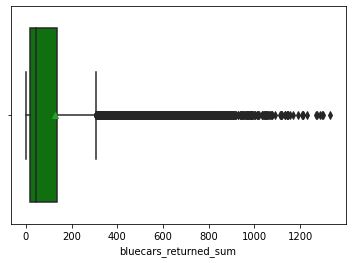

In [32]:
#Box plot for sum of blue cars returned
## boxplot
sns.boxplot(df['bluecars_returned_sum'], color='green',showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


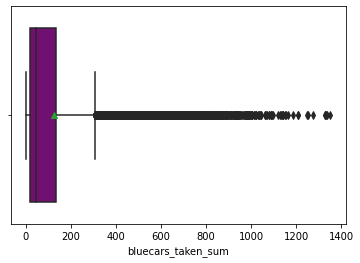

In [33]:
sns.boxplot(df['bluecars_taken_sum'],color='purple', showmeans=True)

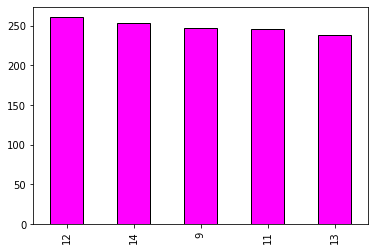

In [34]:
#Bar chart for sum of blue cars taken
df['bluecars_taken_sum'].value_counts().head().plot.bar(color='magenta', edgecolor='black')


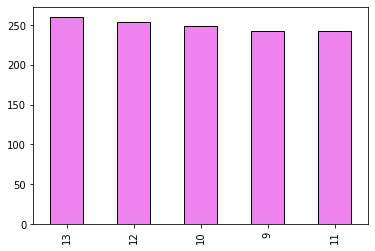

In [35]:
#Bar chart for sum of blue cars returned
df['bluecars_returned_sum'].value_counts().head().plot.bar(color='violet', edgecolor='black')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars taken')

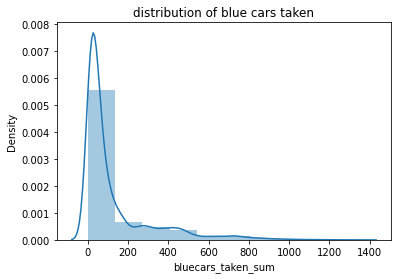

In [36]:
# Plot bluecars taken
sns.distplot(df['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars returned')

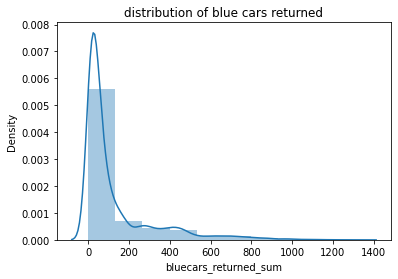

In [37]:
# Plot bluecars returned 
sns.distplot(df['bluecars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')

##Bivariate analysis

### Numerical and Numerical

***##Scatter plots***

In [38]:
df.head(1)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,week_day
0,75001,2018-01-01,1440,0,weekday,110,103,22,20,Mon


In [39]:
#Grouping our sum of bluecars taken according to the day of week
scatter=df.groupby('dayofweek')['bluecars_taken_sum'].sum().reset_index(name='total')
scatter

,dayofweek,total
0,0,263893
1,1,261940
2,2,261849
3,3,263207
4,4,288546
5,5,353934
6,6,332166


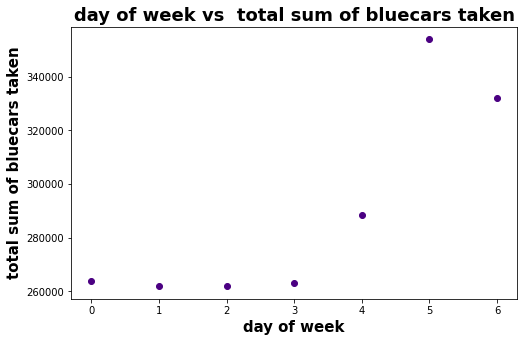

In [40]:
# Plotting our scatterplot
plt.figure(figsize=(8,5))
plt.scatter(scatter["dayofweek"] , scatter["total"], color='indigo')
# Giving our scatterplot a title
plt.title('day of week vs  total sum of bluecars taken', fontweight='bold', fontsize=18)

# Labelling our x axis
plt.xlabel('day of week', fontweight='bold', fontsize=15)

# Labelling our y axis
plt.ylabel('total sum of bluecars taken', fontweight='bold', fontsize=15)

# Displaying our scatterplot
plt.show()

In [41]:
#Grouping our sum of bluecars taken according to the day of week
scatter1=df.groupby('dayofweek')['bluecars_returned_sum'].sum().reset_index(name='total')
scatter1

,dayofweek,total
0,0,264808
1,1,260470
2,2,260673
3,3,262961
4,4,286029
5,5,351570
6,6,338795


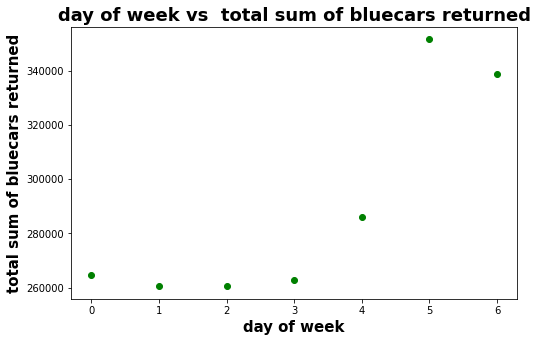

In [42]:
# Plotting our scatterplot
plt.figure(figsize=(8,5))
plt.scatter(scatter1["dayofweek"] , scatter1["total"], color='green')
# Giving our scatterplot a title
plt.title('day of week vs  total sum of bluecars returned', fontweight='bold', fontsize=18)

# Labelling our x axis
plt.xlabel('day of week', fontweight='bold', fontsize=15)

# Labelling our y axis
plt.ylabel('total sum of bluecars returned', fontweight='bold', fontsize=15)

# Displaying our scatterplot
plt.show()

In [43]:
#Grouping our sum of bluecars taken according to the day of week
scatter2=df.groupby('dayofweek')['n_daily_data_points'].sum().reset_index(name='total')
scatter2

,dayofweek,total
0,0,3413410
1,1,3391795
2,2,3229754
3,3,3215069
4,4,3257976
5,5,3246982
6,6,3267967


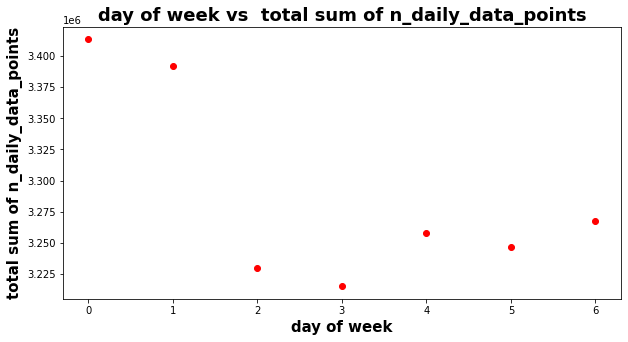

In [44]:
# Plotting our scatterplot
plt.figure(figsize=(10,5))
plt.scatter(scatter2["dayofweek"] , scatter2["total"], color='red')
# Giving our scatterplot a title
plt.title('day of week vs  total sum of n_daily_data_points', fontweight='bold', fontsize=18)

# Labelling our x axis
plt.xlabel('day of week', fontweight='bold', fontsize=15)

# Labelling our y axis
plt.ylabel('total sum of n_daily_data_points', fontweight='bold', fontsize=15)

# Displaying our scatterplot
plt.show()

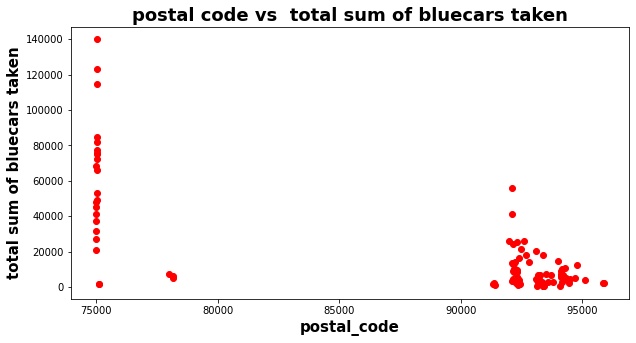

In [45]:
#Grouping our sum of bluecars taken according to the postal code
scatter3=df.groupby('postal_code')['bluecars_taken_sum'].sum().reset_index(name='total')
scatter3
# Plotting our scatterplot
plt.figure(figsize=(10,5))
plt.scatter(scatter3["postal_code"] , scatter3["total"], color='red')
# Giving our scatterplot a title
plt.title('postal code vs  total sum of bluecars taken', fontweight='bold', fontsize=18)

# Labelling our x axis
plt.xlabel('postal_code', fontweight='bold', fontsize=15)

# Labelling our y axis
plt.ylabel('total sum of bluecars taken', fontweight='bold', fontsize=15)

# Displaying our scatterplot
plt.show()

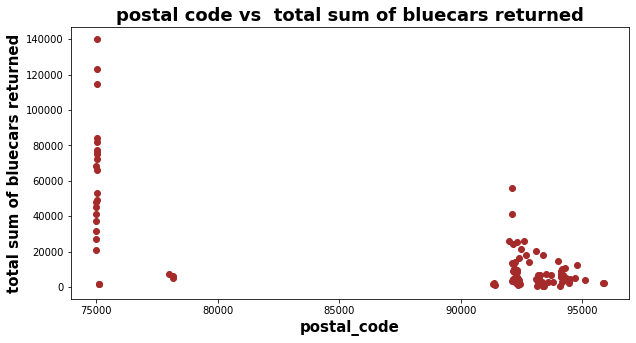

In [46]:
#Grouping our sum of bluecars taken according to the postal code
scatter4=df.groupby('postal_code')['bluecars_returned_sum'].sum().reset_index(name='total')
scatter4
# Plotting our scatterplot
plt.figure(figsize=(10,5))
plt.scatter(scatter4["postal_code"] , scatter4["total"], color='brown')
# Giving our scatterplot a title
plt.title('postal code vs  total sum of bluecars returned', fontweight='bold', fontsize=18)

# Labelling our x axis
plt.xlabel('postal_code', fontweight='bold', fontsize=15)

# Labelling our y axis
plt.ylabel('total sum of bluecars returned', fontweight='bold', fontsize=15)

# Displaying our scatterplot
plt.show()

***##Correlation***

In [47]:
# Calculating the pearson coefficient
pearson_coeff = df["dayofweek"].corr(df["bluecars_returned_sum"], method="pearson") 
print(pearson_coeff)
# The respondent age and household size have a very weak positive correlation

0.08195445794154745


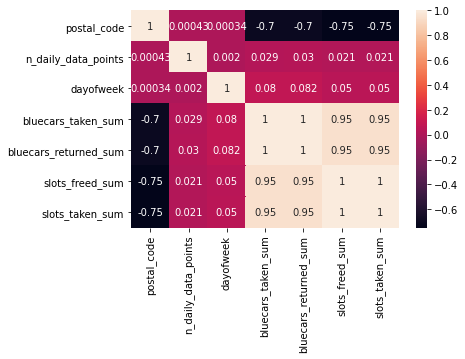

In [48]:
# showing correlation on a heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

### Categorical and categorical

***##Stacked column chart***

Text(0, 0.5, 'day type')

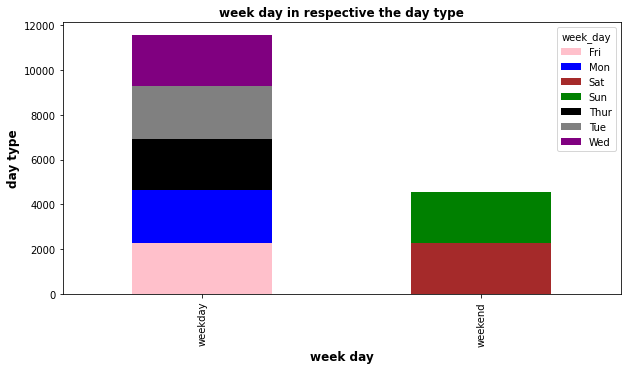

In [49]:
#Stacked bar chart of weekday with day type
pd.crosstab(df['day_type'],df['week_day']).plot(kind="bar",stacked=True,figsize=(10,5) , color=['pink','blue','brown','green','black','grey','purple'])
plt.title('week day in respective the day type', fontweight='bold', fontsize=12)
plt.xlabel('week day', fontweight='bold', fontsize=12)
plt.ylabel('day type', fontweight='bold', fontsize=12)

### Categorical and Numerical

***##line graghs***

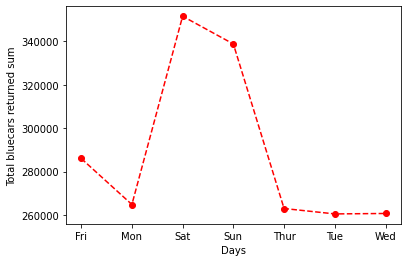

In [50]:
grouped = df.groupby('week_day')['bluecars_returned_sum'].sum().reset_index(name= 'total_bluecars_returned_sum')
grouped
x = grouped['week_day']
y= grouped['total_bluecars_returned_sum']
plt.plot(x,y,color = 'red',marker = 'o',linestyle = '--')
plt.xlabel('Days')
plt.ylabel('Total bluecars returned sum')
plt.show()

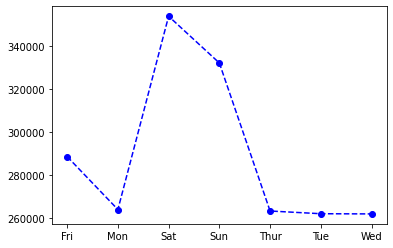

In [51]:
grouped1 = df.groupby('week_day')['bluecars_taken_sum'].sum().reset_index(name= 'total_bluecars_taken_sum')
grouped1
x = grouped1['week_day']
y= grouped1['total_bluecars_taken_sum']
plt.plot(x,y,color = 'blue',marker = 'o',linestyle = '--')
plt.show()

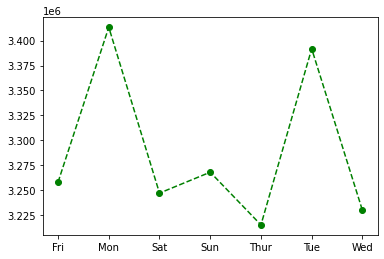

In [52]:
grouped3= df.groupby('week_day')['n_daily_data_points'].sum().reset_index(name= 'total_n_daily_data_points')
grouped3
x = grouped3['week_day']
y= grouped3['total_n_daily_data_points']
plt.plot(x,y,color = 'green',marker = 'o',linestyle = '--')
plt.show()

***##Z Score***

In [53]:
from scipy import stats
from scipy.stats import zscore

In [54]:
#Z Score for bluecars taken
taken = df['bluecars_taken_sum']
from scipy.stats import zscore
stats.zscore(taken)

array([-0.08589624, -0.15061389,  0.06511162, ..., -0.50116785,
       -0.61981688, -0.66835512])

In [55]:
#Z Score for bluecars returned
returned = df['bluecars_returned_sum']
from scipy.stats import zscore
stats.zscore(returned)

array([-0.12352149, -0.17204012,  0.07055302, ..., -0.49010667,
       -0.6033168 , -0.6680083 ])

In [56]:
#Z Score for postal code
returned = df['postal_code']
from scipy.stats import zscore
stats.zscore(returned)

array([-1.8033354 , -1.8033354 , -1.8033354 , ...,  0.92697914,
        0.92697914,  0.92697914])

> T-Score

In [73]:
from scipy.stats import ttest_ind
ttest_ind(df['bluecars_returned_sum'],df['bluecars_taken_sum'])

Ttest_indResult(statistic=-0.006884147830984164, pvalue=0.994507330804926)

## Multivariate analysis

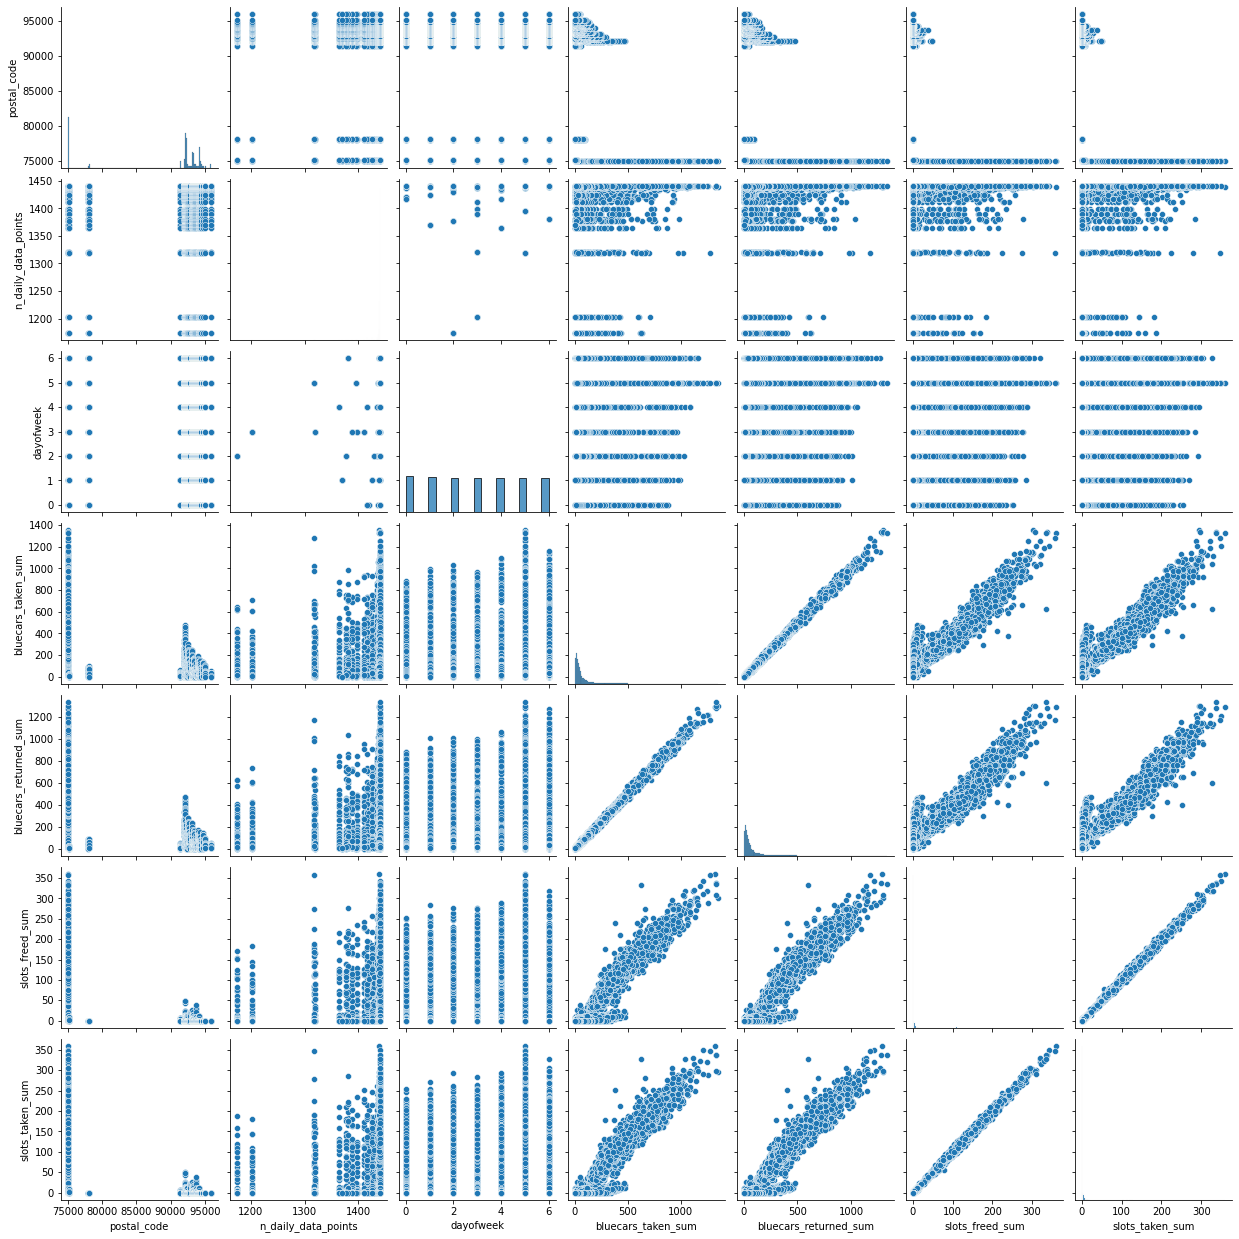

In [57]:
#Plotting a pair plot
sns.pairplot(df)
plt.show()

# Implementing the Solution

## Hypothesis testing

In [58]:
##  Null hypothesis: 
     #there is no difference in the average number of blue cars taken on saturday and that of the blue cars taken on sunday? 
## Alternative hypothesis:
        #there is a difference in the average number of blue cars taken on saturday to that of the blue cars taken on sunday(***CLAIM:***)

In [59]:
#Checking columns
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum', 'week_day'],
      dtype='object')

In [60]:
#Locating the rows where the day type is weekend since our hypothesis only needed the weekend
df1 = df.loc[df['day_type'] == 'weekend']
df1

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,week_day
5,75001,2018-01-06,1437,5,weekend,187,185,38,35,Sat
6,75001,2018-01-07,1440,6,weekend,180,180,34,34,Sun
12,75001,2018-01-13,1440,5,weekend,224,223,38,38,Sat
13,75001,2018-01-14,1440,6,weekend,193,193,22,20,Sun
19,75001,2018-01-20,1439,5,weekend,217,217,41,39,Sat
...,...,...,...,...,...,...,...,...,...,...
16068,95880,2018-06-03,1440,6,weekend,36,33,0,0,Sun
16074,95880,2018-06-09,1440,5,weekend,15,15,0,0,Sat
16075,95880,2018-06-10,1440,6,weekend,34,32,0,0,Sun
16081,95880,2018-06-16,1440,5,weekend,19,19,0,0,Sat


In [61]:

#Dropping unrequired columns
to_drop1 = ['date',	'n_daily_data_points', 'day_type', 'slots_freed_sum',	'slots_taken_sum',	'week_day']
df1.drop(to_drop1, axis=1, inplace=True)
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
5,75001,5,187,185
6,75001,6,180,180
12,75001,5,224,223
13,75001,6,193,193
19,75001,5,217,217
...,...,...,...,...
16068,95880,6,36,33
16074,95880,5,15,15
16075,95880,6,34,32
16081,95880,5,19,19


In [62]:
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
import os                     # For os related operations
import sys 

# **stratified sampling**

In [63]:
# Stratified sample
df2 = df1.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df2

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
3341,75116,5,13,13
1586,75011,5,679,690
7949,92330,5,45,39
3085,75020,5,558,519
13332,94110,5,1,4
...,...,...,...,...
66,75001,6,180,177
13196,94100,6,10,9
12780,93700,6,44,40
1023,75007,6,287,270


In [64]:
# population mean for blue cars taken
popmean = df['bluecars_taken_sum'].mean()
popmean

125.92695057506994

In [65]:
# sample mean for blue cars taken
samplemean = df2['bluecars_taken_sum'].mean()
samplemean

151.9647577092511

In [66]:
# sample standard deviation for bluecars taken
std = df2['bluecars_taken_sum'].std()
std

209.64971014228655

In [67]:
# calculating the z-score for blue cars taken
zscore = (samplemean-popmean) / std
zscore

0.12419672374700466

In [68]:
#calculating the p value
from scipy.stats import norm
pro = stats.norm.cdf(zscore)
pro

0.5494202418863532

In [69]:
#interpretation of the p value
if pro < 0.05:    # alpha value is 0.05 or 5%
   print(" we  reject the null  hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [70]:
# point estimation
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

df['bluecars_taken_sum'].mean() - df2['bluecars_taken_sum'].mean()

-26.037807134181165

In [71]:
import math
sample_mean = df2['bluecars_taken_sum'].mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:\n", z_critical)              # Check the z-critical value                       

pop_stdev = df['bluecars_taken_sum'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(454))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:\n", confidence_interval)

z-critical value:
 1.959963984540054
Confidence interval:
 (134.90817007322107, 169.02134534528113)


# Normality test.

# Conclusion
> We fail to reject the null hypothesis and conclude that there was no sufficient evidence to suggest that there is a difference in the average number of blue cars taken on saturday to that of the blue cars taken on sunday(***CLAIM:***)